In [58]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # Alignments 

import seaborn as sns # theme & dataset
print(f'Matplotlib Version : {mpl.__version__}')
print(f'Seaborn Version : {sns.__version__}')

# for visualization samples
import pandas as pd
from scipy import stats


Matplotlib Version : 3.5.2
Seaborn Version : 0.11.2


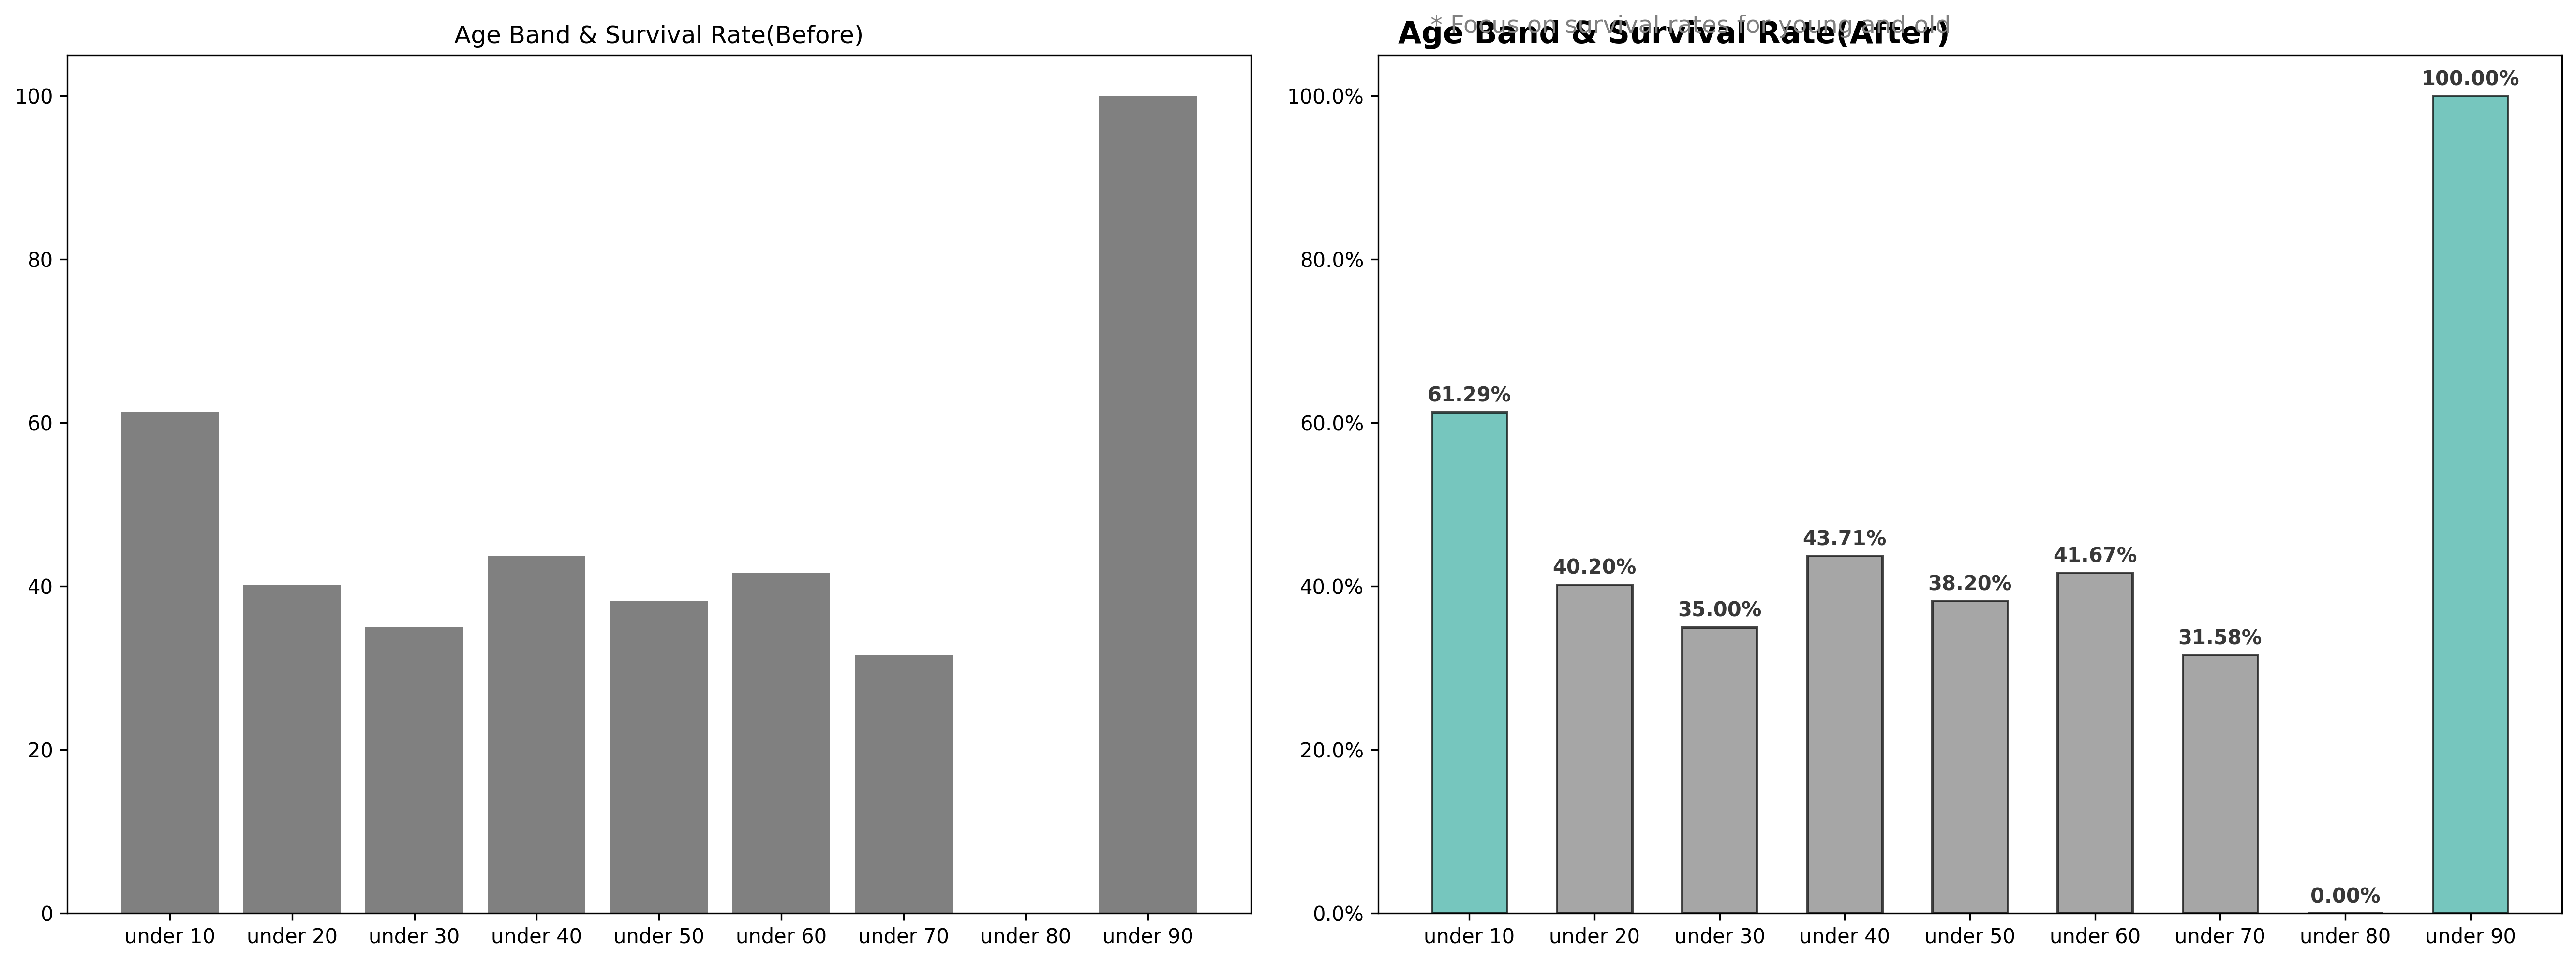

In [59]:
from matplotlib.ticker import FuncFormatter

def age_band(num):
    for i in range(1, 100):
        if num < 10*i : 
            return f'under {i*10}'
 
titanic_train = pd.read_csv("datasets/train.csv")
titanic_train['age_band'] = titanic_train['Age'].apply(age_band)
titanic_age = titanic_train[['age_band', 'Survived']].groupby('age_band')['Survived'].value_counts().sort_index().unstack().fillna(0)

titanic_age['Survival rate'] = titanic_age[1] / (titanic_age[0] + titanic_age[1]) * 100

fig, ax = plt.subplots(1, 2, figsize=(18, 7), dpi=300)

# ax1
ax[0].bar(titanic_age['Survival rate'].index, titanic_age['Survival rate'], color='gray')
ax[0].set_title('Age Band & Survival Rate(Before)')

# ax2
color_map = ['gray' for _ in range(9)]
color_map[0] = color_map[8] = '#3caea3'
ax[1].bar(titanic_age['Survival rate'].index, titanic_age['Survival rate'], alpha=0.7, color=color_map, width=0.6, edgecolor='black', linewidth=1.2)
ax[1].set_title('Age Band & Survival Rate(After)', fontsize=15, fontweight='bold', position=(0.25, 1.0+0.05))
for i in titanic_age['Survival rate'].index:
    ax[1].annotate(f"{titanic_age['Survival rate'][i]:.02f}%", 
                   xy=(i, titanic_age['Survival rate'][i] + 2),
                   va = 'center', ha='center',fontweight='bold', color='#383838')

ax[1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:}%')) 
plt.suptitle('* Focus on survival rates for young and old', x=0.65, y=0.94, color='gray')
plt.subplots_adjust(left=0.5, right=0.8)
plt.tight_layout()
plt.show()

In [60]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,under 30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,under 40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,under 30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,under 40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,under 40


In [61]:
df_selec = titanic_train.loc[:,['Name', 'Sex', 'Age', 'Survived']]
df_selec.head()
df_death = titanic_train['Survived'].values == 1
df_death

array([False,  True,  True,  True, False, False, False, False,  True,
        True,  True,  True, False, False, False,  True, False,  True,
       False,  True, False,  True,  True,  True, False,  True, False,
       False,  True, False, False,  True,  True, False, False, False,
        True, False, False,  True, False, False, False,  True,  True,
       False, False,  True, False, False, False, False,  True,  True,
       False,  True,  True, False,  True, False, False,  True, False,
       False, False,  True,  True, False,  True, False, False, False,
       False, False,  True, False, False, False,  True,  True, False,
        True,  True, False,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False,  True,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False,  True,

In [62]:
df_death
df_death_lis = []
for i in df_death:
    if i == 1:
     df_death_lis.append(i)
     
print(f'''
{df_death_lis}
{df_death} 
{len(df_death_lis)}
{len(df_death)} 
''')   
len(df_death_lis)


[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, Tr

342

In [63]:
df_selec['Name'].count()


891

In [64]:
df_selec['Survived'].count()

891

In [65]:
df_selec['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [66]:
count_h = 0
count_m = 0

for i in df_selec['Sex']:
    if i == 'female':
        count_m += 1
    if i == 'male':
        count_h += 1

print(f'''
{count_m} mujeres
{count_h} hombres
''')


314 mujeres
577 hombres



In [67]:
media_edad_total = df_selec['Age'].mean()
media_edad_total

29.69911764705882

In [68]:
describe_edad_total = df_selec['Age'].describe()
describe_edad_total

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [69]:
girls = df_selec[df_selec['Sex'] == 'female']['Name']
print(f'''
{girls.head()}
{len(girls)}
{type(girls)}''')


1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object
314
<class 'pandas.core.series.Series'>


In [70]:
boys = df_selec[df_selec['Sex'] == 'male']['Name']
print(f'''
{boys.head()}
{len(boys)}
{type(boys)}''')


0           Braund, Mr. Owen Harris
4          Allen, Mr. William Henry
5                  Moran, Mr. James
6           McCarthy, Mr. Timothy J
7    Palsson, Master. Gosta Leonard
Name: Name, dtype: object
577
<class 'pandas.core.series.Series'>


In [71]:
df_selec['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

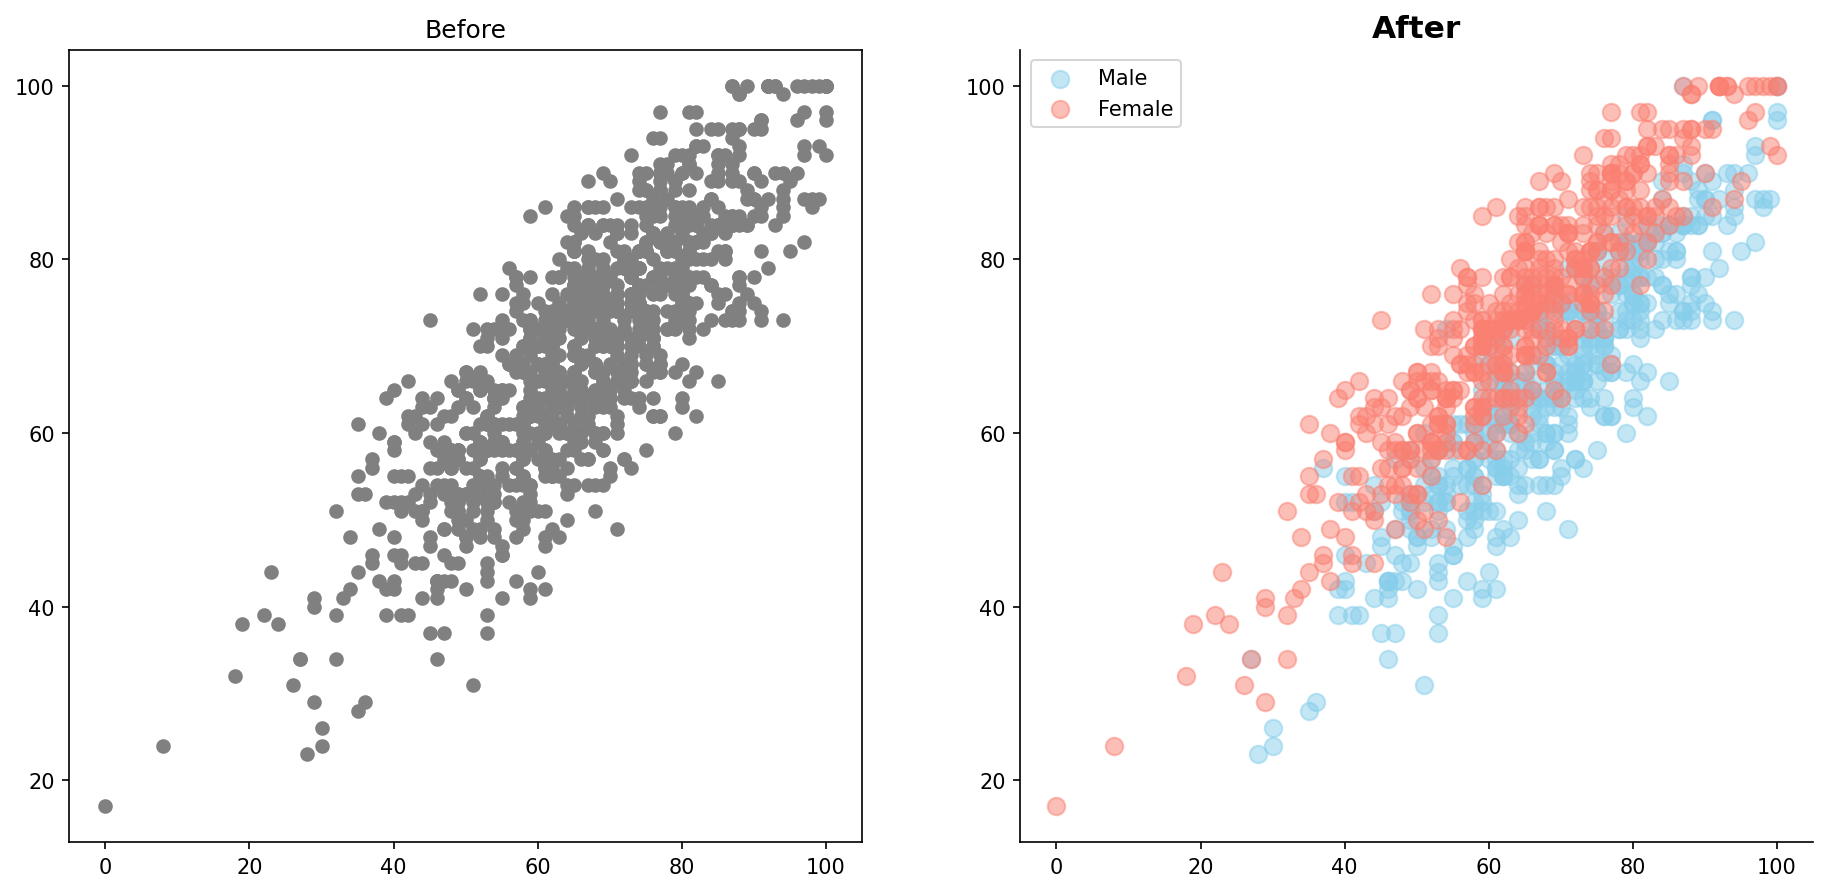

In [72]:
import seaborn as sns
exam_data = pd.read_csv("datasets/StudentsPerformance.csv")
fig, ax = plt.subplots(1, 2, figsize = (15, 7), dpi=150)

ax[0].scatter(x='math score', y='reading score',data=exam_data, color='gray')
ax[0].set_title('Before')

# You can use sns.scatterplot + hue parameter
ax[1].scatter(x='math score', y='reading score',data=exam_data[exam_data['gender']=='male'], color='skyblue', alpha=0.5, label='Male', s=70)
ax[1].scatter(x='math score', y='reading score',data=exam_data[exam_data['gender']=='female'], color='salmon', alpha=0.5, label='Female', s=70)
ax[1].set_title('After', fontsize=15, fontweight='bold')

ax[1].legend()

# upper & right border remove 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [73]:
exam_data.head(8)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39


c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math score', ylabel='Density'>

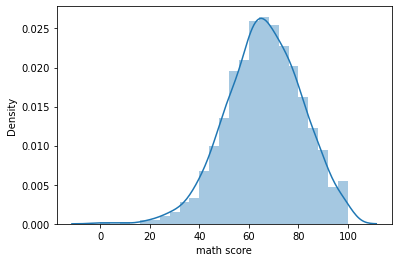

In [74]:
sns.distplot(exam_data['math score'].dropna())#, rug=True, fit=stats.norm

In [75]:
exam_data.shape

(1000, 8)

In [76]:
exam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [79]:
exam_data['race/ethnicity'].describe()

count        1000
unique          5
top       group C
freq          319
Name: race/ethnicity, dtype: object

In [80]:
exam_data['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [84]:
porcent_exam_data = (exam_data['parental level of education'].value_counts('%'))* 100
porcent_exam_data

some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: parental level of education, dtype: float64